In [37]:
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ast

In [38]:
df  = pd.read_csv('DataBase.csv')
df.head()

,time,s2,s3,s1
0,5.247,"{'ax': 1.060631, 'ay': -0.02154782, 'wz': 0.61...","{'ax': 31959, 'ay': 31751, 'wz': 31927, 'az': ...","{'ax': 1.070208, 'ay': -0.02154782, 'wz': 0.67..."
1,5.267,"{'ax': 0.8954314, 'ay': -0.1197101, 'wz': 0.56...","{'ax': 29703, 'ay': 29543, 'wz': 29623, 'az': ...","{'ax': 0.914585, 'ay': -0.3280056, 'wz': 0.561..."
2,5.287,"{'ax': 1.00317, 'ay': -0.01436521, 'wz': 0.511...","{'ax': 32423, 'ay': 32439, 'wz': 32471, 'az': ...","{'ax': 0.9911995, 'ay': -0.002394202, 'wz': 0...."
3,5.307,"{'ax': 1.223437, 'ay': -0.007182605, 'wz': 0.4...","{'ax': 31639, 'ay': 31383, 'wz': 31575, 'az': ...","{'ax': 1.18513, 'ay': -0.08858546, 'wz': 0.474..."
4,5.327,"{'ax': 1.04866, 'ay': -0.09816227, 'wz': 0.458...","{'ax': 31591, 'ay': 31687, 'wz': 31495, 'az': ...","{'ax': 1.125275, 'ay': -0.08858546, 'wz': 0.45..."


# TRATAMENTO DE DADOS

In [39]:
df = df.head(20000).copy()

In [40]:
sensors = df.drop(columns=['time']).columns.tolist()
sensors

['s2', 's3', 's1']

In [41]:
for s in sensors:
    df[s] = df[s].apply(ast.literal_eval)

df

,time,s2,s3,s1
0,5.247,"{'ax': 1.060631, 'ay': -0.02154782, 'wz': 0.61...","{'ax': 31959, 'ay': 31751, 'wz': 31927, 'az': ...","{'ax': 1.070208, 'ay': -0.02154782, 'wz': 0.67..."
1,5.267,"{'ax': 0.8954314, 'ay': -0.1197101, 'wz': 0.56...","{'ax': 29703, 'ay': 29543, 'wz': 29623, 'az': ...","{'ax': 0.914585, 'ay': -0.3280056, 'wz': 0.561..."
2,5.287,"{'ax': 1.00317, 'ay': -0.01436521, 'wz': 0.511...","{'ax': 32423, 'ay': 32439, 'wz': 32471, 'az': ...","{'ax': 0.9911995, 'ay': -0.002394202, 'wz': 0...."
3,5.307,"{'ax': 1.223437, 'ay': -0.007182605, 'wz': 0.4...","{'ax': 31639, 'ay': 31383, 'wz': 31575, 'az': ...","{'ax': 1.18513, 'ay': -0.08858546, 'wz': 0.474..."
4,5.327,"{'ax': 1.04866, 'ay': -0.09816227, 'wz': 0.458...","{'ax': 31591, 'ay': 31687, 'wz': 31495, 'az': ...","{'ax': 1.125275, 'ay': -0.08858546, 'wz': 0.45..."
...,...,...,...,...
6240,130.102,"{'ax': 1.180341, 'ay': 1.108515, 'wz': 0.02731...","{'ax': 33240, 'ay': 33064, 'wz': 33256, 'az': ...","{'ax': 1.201889, 'ay': 1.130063, 'wz': 0.02971..."
6241,130.122,"{'ax': 1.161188, 'ay': 1.146823, 'wz': 0.01665...","{'ax': 33192, 'ay': 33320, 'wz': 33272, 'az': ...","{'ax': 1.18513, 'ay': 1.146823, 'wz': 0.029710..."
6242,130.142,"{'ax': 1.223437, 'ay': 1.108515, 'wz': 0.02957...","{'ax': 33128, 'ay': 32968, 'wz': 33208, 'az': ...","{'ax': 1.204283, 'ay': 1.170765, 'wz': 0.03104..."
6243,130.162,"{'ax': 1.21386, 'ay': 1.137246, 'wz': 0.028777...","{'ax': 33208, 'ay': 33128, 'wz': 33096, 'az': ...","{'ax': 1.199495, 'ay': 1.144428, 'wz': 0.03290..."


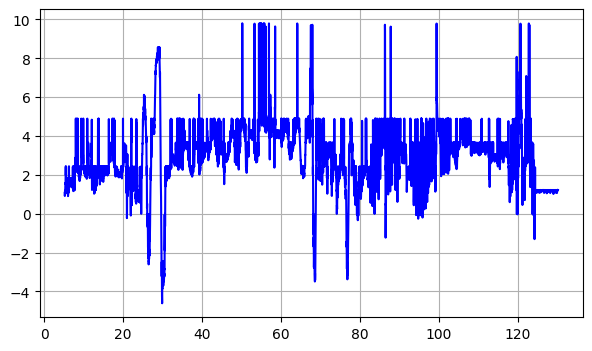

In [42]:
def getData(sensor, key):
    return np.array([data[key] for data in df[sensor]])

plt.figure(figsize=(7, 4))
plt.plot(df.time, getData('s1', 'ax'), color='blue')
plt.grid()

# LIMITES

In [43]:
key    = 'wx'
sensor = 's1'
SAMPLE_RANGE = (35, 70)

In [44]:
df = df.copy().loc[(df.time > SAMPLE_RANGE[0]) & (df.time < SAMPLE_RANGE[1])]
df['time'] = df.time - df.time.values[0]
df

,time,s2,s3,s1
1488,0.000,"{'ax': 3.062184, 'ay': -3.866636, 'wz': -0.580...","{'ax': 16436, 'ay': 16564, 'wz': 16548, 'az': ...","{'ax': 3.009511, 'ay': -3.938462, 'wz': -0.565..."
1489,0.020,"{'ax': 4.898537, 'ay': -2.607286, 'wz': -0.700...","{'ax': 13347, 'ay': 13187, 'wz': 13331, 'az': ...","{'ax': 2.53546, 'ay': -2.571373, 'wz': -0.6909..."
1490,0.040,"{'ax': 2.372654, 'ay': -3.153164, 'wz': -0.545...","{'ax': 10530, 'ay': 10626, 'wz': 10466, 'az': ...","{'ax': 2.365471, 'ay': -3.222595, 'wz': -0.547..."
1491,0.060,"{'ax': 2.286463, 'ay': -2.760514, 'wz': -0.614...","{'ax': 8177, 'ay': 8177, 'wz': 8177, 'az': 817...","{'ax': 2.288857, 'ay': -2.762909, 'wz': -0.615..."
1492,0.080,"{'ax': 2.257732, 'ay': -1.323994, 'wz': -0.000...","{'ax': 7425, 'ay': 7553, 'wz': 7553, 'az': 724...","{'ax': 2.257732, 'ay': -1.381454, 'wz': -0.068..."
...,...,...,...,...
3232,34.883,"{'ax': 2.296039, 'ay': -0.7685388, 'wz': -0.41...","{'ax': 16227, 'ay': 16211, 'wz': 16291, 'az': ...","{'ax': 2.291251, 'ay': -0.7805098, 'wz': -0.40..."
3233,34.903,"{'ax': 2.449268, 'ay': -0.1556231, 'wz': -0.41...","{'ax': 17092, 'ay': 17092, 'wz': 17140, 'az': ...","{'ax': 2.44448, 'ay': -0.1843535, 'wz': -0.415..."
3234,34.923,"{'ax': 2.3535, 'ay': -0.1939303, 'wz': -0.3078...","{'ax': 18004, 'ay': 17972, 'wz': 18052, 'az': ...","{'ax': 2.372654, 'ay': -0.1795651, 'wz': -0.31..."
3235,34.943,"{'ax': 2.061408, 'ay': -0.225055, 'wz': -0.309...","{'ax': 19972, 'ay': 19652, 'wz': 19780, 'az': ...","{'ax': 2.066196, 'ay': -0.2322376, 'wz': -0.30..."


# ANÁLISE

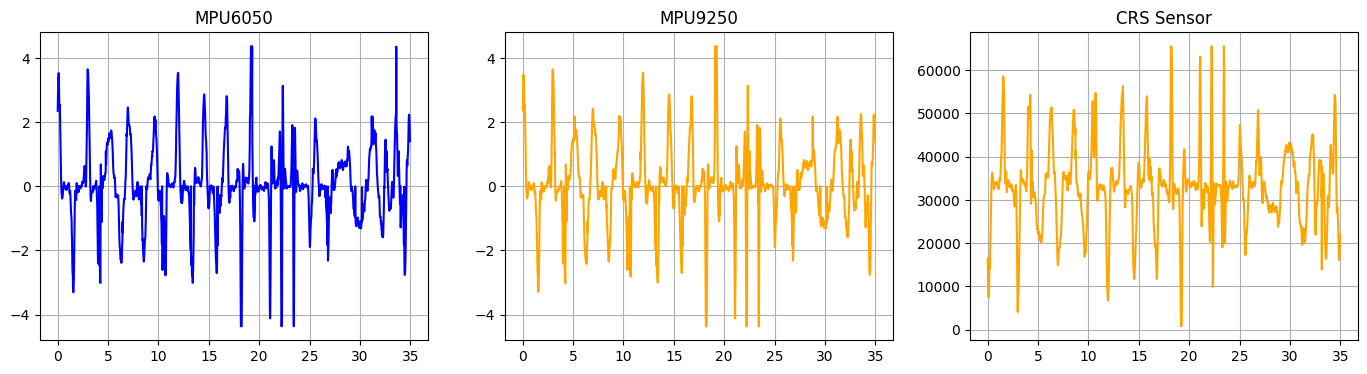

In [45]:
plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.plot(df.time, getData('s1', key), color='blue')
plt.title('MPU6050')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(df.time, getData('s2', key), color='orange')
plt.title('MPU9250')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(df.time, getData('s3', key), color='orange')
plt.title('CRS Sensor')
plt.grid()

- Comparação normalizada com erro relacionado à distancia entre os pontos

In [46]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score

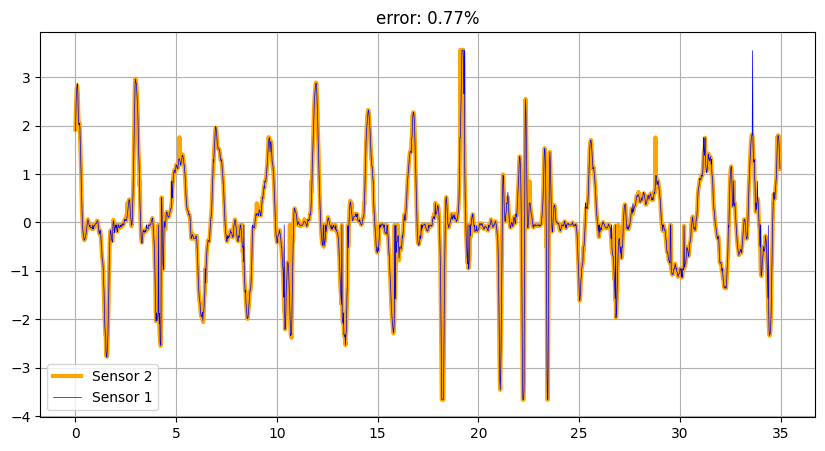

In [47]:
y, x, score = compare(getData('s2', key), getData('s1', key))

plt.figure(figsize=(10, 5))
plt.plot(df.time, y, color='orange', label='Sensor 2', linewidth=3)
plt.plot(df.time, x, color='blue',  label='Sensor 1', linewidth=0.5)
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

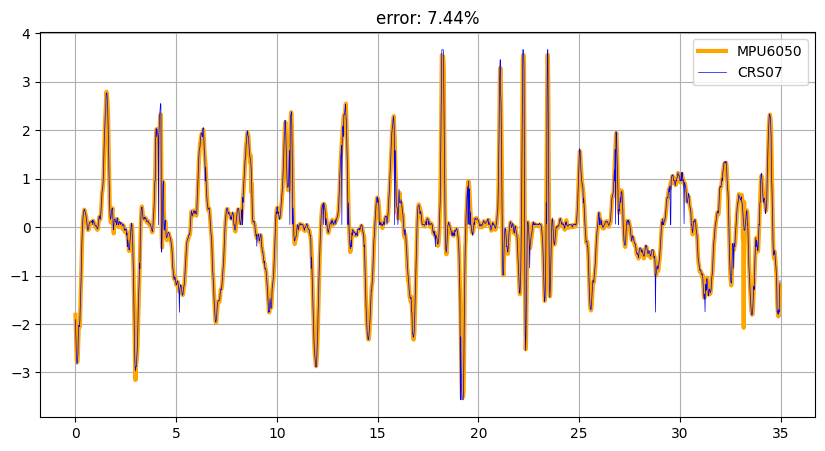

In [48]:
y, x, score = compare(getData('s3', key), getData('s2', key))

plt.figure(figsize=(10, 5))
plt.plot(df.time, y, color='orange', label='MPU6050', linewidth=3)
plt.plot(df.time, -x, color='blue',  label='CRS07', linewidth=.5)
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()